<a href="https://colab.research.google.com/github/Adizcool/Twitter_Sentiment_Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries

import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
#Uploading txt file with all the keys

from google.colab import files
upload = files.upload()

Saving Api.txt to Api (3).txt


In [ ]:
#Extracting the keys

for i in upload:
  j = i
k = upload[j]
keys = ['', '', '', '', '']
m = 0
cnt = 0
k = str(k, 'utf-8')
for i in k:
  if i != '\n' and i != '\r':
    keys[m] += i
  else:
    cnt += 1
  if cnt == 2:
    cnt = 0
    m += 1
ck = keys[0]
cs = keys[1]
bt = keys[2]
akt = keys[3]
akts = keys[4]

In [ ]:
#Creating API object

auth = tweepy.OAuthHandler(ck, cs)
auth.set_access_token(akt, akts)
api = tweepy.API(auth, wait_on_rate_limit = False)

In [ ]:
#Getting Twitter data

tweets = api.user_timeline(screen_name = "GiggukAZ", count = 200, lang = "en", tweet_mode = "extended", exclude_replies = True)
for tweet in tweets[:5]:
  print(tweet.full_text)
  print()

Ducking Hell https://t.co/xxVJhSsHT4

Feeling like I've been touching a little TOO much grass recently

Can't wait for Attack on Titan Final FINAL Season Part 7 Episode 13.5 Chapter 2: OK this is the last episode for real this time.

Morning people.

Like...why

No I'm not an extrovert, I'm just an introvert with FOMO.



In [ ]:
#Creating Dataframe

df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ['Tweets'])
df.head()

,Tweets
0,Ducking Hell https://t.co/xxVJhSsHT4
1,Feeling like I've been touching a little TOO m...
2,Can't wait for Attack on Titan Final FINAL Sea...
3,Morning people.\n\nLike...why
4,"No I'm not an extrovert, I'm just an introvert..."


In [ ]:
#Removing problematic words and cleaning data

def clean(text):
  text = re.sub(r'@[^\s]+', '', text)
  text = re.sub(r'#[^\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'/[\n\r]+/g+', " ", text)
  text = re.sub(r'RT[\s]+', '', text)
  return text

df['Tweets'] = df['Tweets'].apply(clean)

In [ ]:
df.head()

,Tweets
0,Ducking Hell
1,Feeling like I've been touching a little TOO m...
2,Can't wait for Attack on Titan Final FINAL Sea...
3,Morning people.\n\nLike...why
4,"No I'm not an extrovert, I'm just an introvert..."


In [ ]:
#Calculating Subjectivity and Polarity

def sub(text):
  return TextBlob(text).sentiment.subjectivity

def pol(text):
  return TextBlob(text).sentiment.polarity

df['Sub'] = df['Tweets'].apply(sub)
df['Pol'] = df['Tweets'].apply(pol)
df

,Tweets,Sub,Pol
0,Ducking Hell,0.000000,0.000000
1,Feeling like I've been touching a little TOO m...,0.362500,0.128125
2,Can't wait for Attack on Titan Final FINAL Sea...,0.573333,0.140000
3,Morning people.\n\nLike...why,0.000000,0.000000
4,"No I'm not an extrovert, I'm just an introvert...",0.000000,0.000000
...,...,...,...
134,Its 1am and I can't sleep cause I just realise...,0.000000,0.000000
135,"No, I don't know what I was thinking here.",0.000000,0.000000
136,"""I never understood or owned collectable sneak...",1.000000,1.000000
137,Greetings Anime enjoyers\n\n are having a camp...,0.285000,0.165000


In [ ]:
df.count()

Tweets    139
Sub       139
Pol       139
dtype: int64

In [ ]:
#Adding Sentiment column

def sentiment(val):
  if val > 0:
    return 'Positive' 
  elif val < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment'] = df['Pol'].apply(sentiment)
df

,Tweets,Sub,Pol,Sentiment
0,Ducking Hell,0.000000,0.000000,Neutral
1,Feeling like I've been touching a little TOO m...,0.362500,0.128125,Positive
2,Can't wait for Attack on Titan Final FINAL Sea...,0.573333,0.140000,Positive
3,Morning people.\n\nLike...why,0.000000,0.000000,Neutral
4,"No I'm not an extrovert, I'm just an introvert...",0.000000,0.000000,Neutral
...,...,...,...,...
134,Its 1am and I can't sleep cause I just realise...,0.000000,0.000000,Neutral
135,"No, I don't know what I was thinking here.",0.000000,0.000000,Neutral
136,"""I never understood or owned collectable sneak...",1.000000,1.000000,Positive
137,Greetings Anime enjoyers\n\n are having a camp...,0.285000,0.165000,Positive


In [ ]:
#Adding Opinion column

def opinion(val):
  if val > 0.5:
   return 'Personal'
  else:
    return 'Factual'

df['Opinion'] = df['Sub'].apply(opinion)
df

,Tweets,Sub,Pol,Sentiment,Opinion
0,Ducking Hell,0.000000,0.000000,Neutral,Factual
1,Feeling like I've been touching a little TOO m...,0.362500,0.128125,Positive,Factual
2,Can't wait for Attack on Titan Final FINAL Sea...,0.573333,0.140000,Positive,Personal
3,Morning people.\n\nLike...why,0.000000,0.000000,Neutral,Factual
4,"No I'm not an extrovert, I'm just an introvert...",0.000000,0.000000,Neutral,Factual
...,...,...,...,...,...
134,Its 1am and I can't sleep cause I just realise...,0.000000,0.000000,Neutral,Factual
135,"No, I don't know what I was thinking here.",0.000000,0.000000,Neutral,Factual
136,"""I never understood or owned collectable sneak...",1.000000,1.000000,Positive,Personal
137,Greetings Anime enjoyers\n\n are having a camp...,0.285000,0.165000,Positive,Factual


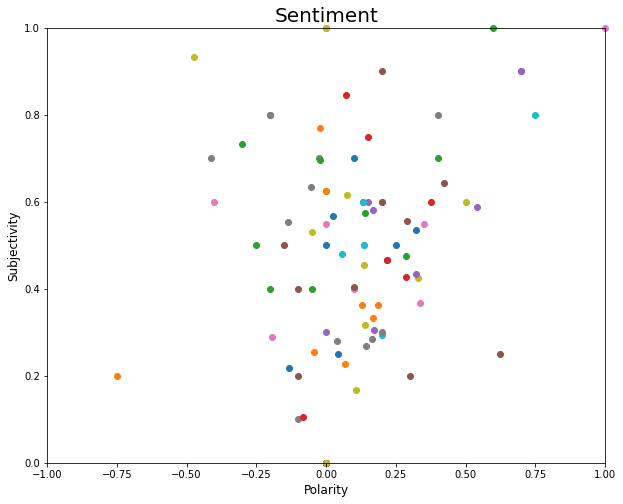

In [ ]:
#Subjectivity vs Polarity plot

plt.figure(figsize = (10, 8))
for i in range(df.shape[0]):
  plt.scatter(df['Pol'][i], df['Sub'][i], clip_on = False)

plt.title('Sentiment', fontsize = 20)
plt.xlabel('Polarity', fontsize = 12)
plt.ylabel('Subjectivity', fontsize = 12)

plt.xlim(-1, 1)
plt.ylim(0, 1)

plt.show()

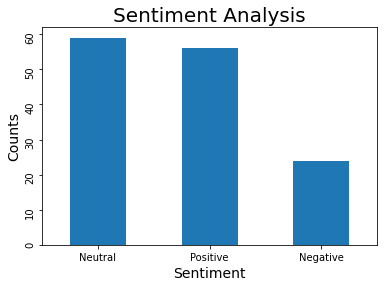

In [ ]:
#Sentiment Analysis Bar plot

plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.yticks(rotation = 90)
plt.xticks(rotation = 0)
plt.show()